<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [8]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

In [9]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [10]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [11]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [1]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
import yfinance as yf

# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [7]:
import yfinance as yf
tesla = yf.Ticker("TSLA")

# Extract historical stock data for the maximum available period
tesla_data = tesla.history(period="max")

print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [8]:
import yfinance as yf
tesla = yf.Ticker("TSLA")

# Extract historical stock data for the maximum available period
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [2]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Save the text of the response
html_data = response.text

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [3]:
from bs4 import BeautifulSoup

# Parse the HTML data using html.parser
soup = BeautifulSoup(html_data, "html.parser")

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [8]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Download the HTML content from the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

# Step 2: Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Isolate the Correct Table (Tesla Quarterly Revenue)
table_body = soup.find_all("tbody")[1]  # Get the second table

# Step 4: Collect Data into a List (more efficient than appending to DataFrame in a loop)
data = []  # List to store extracted data

rows = table_body.find_all("tr")  # Get all rows in the table
for row in rows:
    cols = row.find_all("td")  # Get all columns in the row
    
    if len(cols) == 2:  # Ensure the row has both Date and Revenue columns
        date = cols[0].text.strip()  # Extract date
        revenue = cols[1].text.strip()  # Extract revenue
        
        # Append the row to the data list
        data.append({"Date": date, "Revenue": revenue})

# Step 5: Convert the data list into a DataFrame
tesla_revenue = pd.DataFrame(data)

# Step 6: Clean the 'Revenue' column by removing commas and dollar signs
# Convert the 'Revenue' column to string before applying .str.replace()
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].astype(str).str.replace(r',|\$', "", regex=True)

# Convert 'Revenue' to numeric
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")

# Drop rows with missing values
tesla_revenue.dropna(inplace=True)

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [11]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].astype(str).str.replace(r',|\$', "")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [12]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [13]:
# Display the last 5 rows of the tesla_revenue DataFrame
print(tesla_revenue.tail())

          Date Revenue
48  2010-09-30    31.0
49  2010-06-30    28.0
50  2010-03-31    21.0
52  2009-09-30    46.0
53  2009-06-30    27.0


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [14]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
gme_ticker = yf.Ticker("GME")

# Display the ticker object to confirm
print(gme_ticker)

yfinance.Ticker object <GME>


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [15]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
gme_ticker = yf.Ticker("GME")

# Extract historical stock data with the maximum time period
gme_data = gme_ticker.history(period="max")

# Display the first few rows of the dataframe to confirm
print(gme_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [16]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
gme_ticker = yf.Ticker("GME")

# Extract historical stock data with the maximum time period
gme_data = gme_ticker.history(period="max")

# Reset the index of the DataFrame
gme_data.reset_index(inplace=True)

# Display the first 5 rows of the DataFrame
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [1]:
import requests

# Define the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request and store the HTML response text
html_data_2 = requests.get(url).text

# Optionally print part of the content to verify
print(html_data_2[:500])  # Display the first 500 characters

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [2]:
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup and the 'html.parser'
soup2 = BeautifulSoup(html_data_2, 'html.parser')

# Optional: print the title of the page to confirm parsing
print(soup2.title)

<title>GameStop Revenue 2006-2020 | GME | MacroTrends</title>


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Step 1: Get the HTML data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text

# Step 2: Parse with BeautifulSoup
soup2 = BeautifulSoup(html_data_2, 'html.parser')

# Step 3: Locate the correct table (GameStop Quarterly Revenue is the second table)
table = soup2.find_all("tbody")[1]

# Step 4: Extract data into a list
data = []

for row in table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue:  # Skip empty revenue rows
            data.append({"Date": date, "Revenue": revenue})

# Step 5: Convert list to DataFrame
gme_revenue = pd.DataFrame(data)

# Step 6: Convert Revenue to numeric and clean the DataFrame
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
gme_revenue.dropna(inplace=True)

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [6]:
print(gme_revenue.tail())

          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


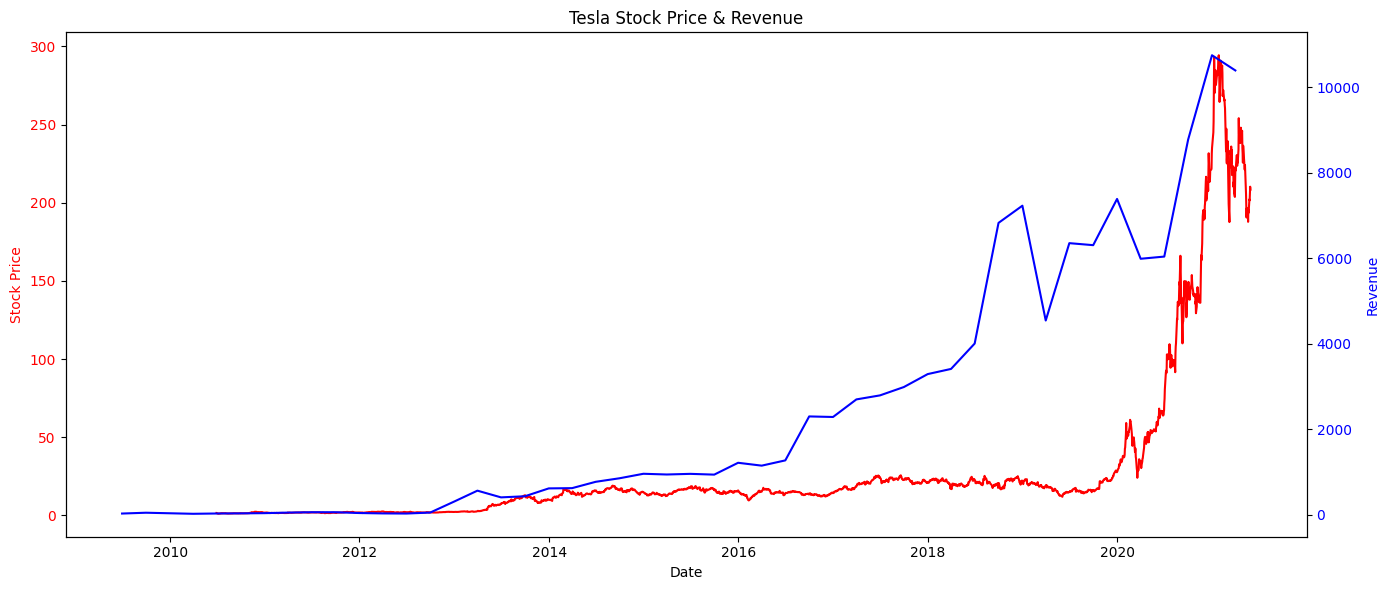

In [12]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Length of revenue_dates: 17
Length of monthly_revenue: 17


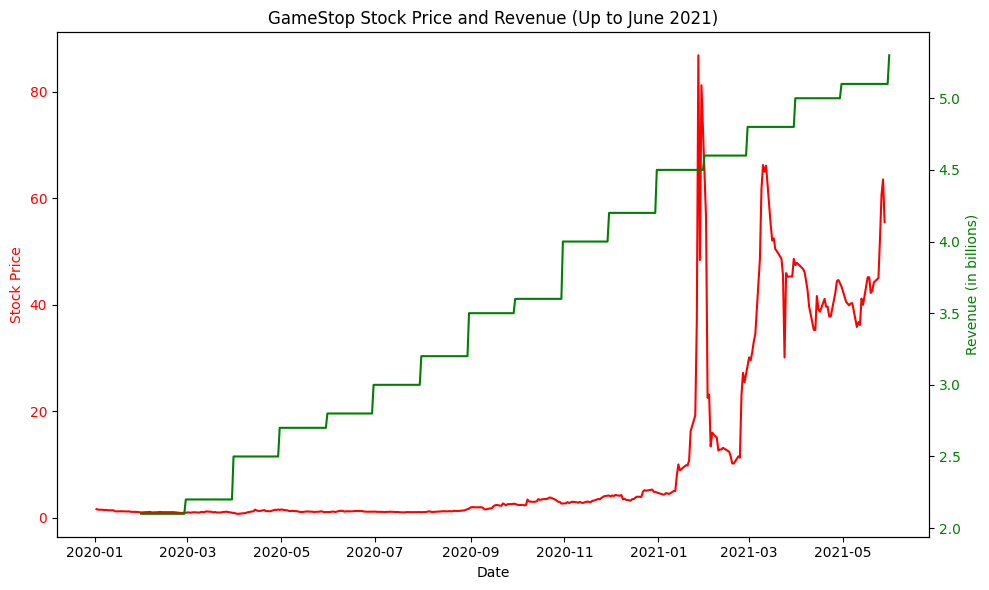

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download GameStop stock data (up to June 2021)
gme_data = yf.download('GME', start='2020-01-01', end='2021-06-01')

# Step 2: Create simulated monthly revenue data (replace with actual data if available)
monthly_revenue = [2.1, 2.2, 2.5, 2.7, 2.8, 3.0, 3.2, 3.5, 3.6, 4.0, 4.2, 4.5, 4.6, 4.8, 5.0, 5.1, 5.3]  # 17 values, one for each month

# Create a date range from January 2020 to June 2021 (monthly frequency)
revenue_dates = pd.date_range('2020-01-01', '2021-06-01', freq='ME')

# Debugging step: Print lengths of both lists
print(f"Length of revenue_dates: {len(revenue_dates)}")
print(f"Length of monthly_revenue: {len(monthly_revenue)}")

# Ensure the revenue dates and revenue data align in length
assert len(monthly_revenue) == len(revenue_dates), "Revenue data and dates do not match in length!"

# Create a DataFrame with the revenue data
gme_revenue = pd.DataFrame({
    'Date': revenue_dates,
    'Revenue': monthly_revenue
})

# Step 3: Resample the revenue data to match the stock data (daily frequency)
# For simplicity, we'll forward-fill the revenue for each day in the corresponding month
gme_revenue.set_index('Date', inplace=True)
gme_revenue = gme_revenue.resample('D').ffill()  # Forward-fill to match daily frequency

# Step 4: Ensure the 'Date' column is in datetime format for both dataframes
gme_data.index = pd.to_datetime(gme_data.index)
gme_revenue.index = pd.to_datetime(gme_revenue.index)

# Step 5: Filter both datasets to include only up to June 2021
gme_data = gme_data[gme_data.index < '2021-06-01']
gme_revenue = gme_revenue[gme_revenue.index < '2021-06-01']

# Step 6: Define the make_graph function
def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot stock price data on the first axis
    ax1.plot(stock_data.index, stock_data['Close'], 'r-', label="Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price", color='red')
    ax1.tick_params(axis='y', labelcolor='red')

    # Create a second y-axis to plot the revenue data
    ax2 = ax1.twinx()
    ax2.plot(revenue_data.index, revenue_data['Revenue'], 'g-', label="Revenue")
    ax2.set_ylabel("Revenue (in billions)", color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Title and show plot
    plt.title(f"{stock} Stock Price and Revenue (Up to June 2021)")
    fig.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Step 7: Call the function to create the graph
make_graph(gme_data, gme_revenue, 'GameStop')

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>


In [4]:
pip install yfinance pandas matplotlib

Note: you may need to restart the kernel to use updated packages.
